In [2]:
#export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192, method='squish'))

In [4]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.217549,0.094998,0.026387,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.095330,0.042852,0.013532,00:06
1,0.036632,0.046426,0.016915,00:05
2,0.019293,0.038611,0.013532,00:05


In [5]:
learn.export('model.pkl')

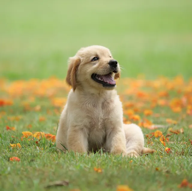

In [6]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [7]:
#export
learn = load_learner('model.pkl')

In [8]:
learn.predict(im)

('False', TensorBase(0), TensorBase([9.9993e-01, 6.6811e-05]))

In [9]:
#export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [10]:
classify_image(im)

{'Dog': 0.9999332427978516, 'Cat': 6.681094237137586e-05}

In [10]:
#export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch()

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7f986cf492b0>,
 'http://127.0.0.1:7860/',
 None)

In [11]:
import requests,base64
from PIL import Image
from io import BytesIO

In [12]:
def data_url(filename, size=(192,192)):
    image = PILImage.create(filename)
    image.thumbnail(size)
    buff = BytesIO()
    image.save(buff, format="JPEG")
    prefix = f'data:image/{Path(filename).suffix[1:]};base64,'
    return prefix + base64.b64encode(buff.getvalue()).decode('utf-8')

In [13]:
data = {"data": [data_url('cat.jpg')]}
res = requests.post(url='https://hf.space/embed/jph00/testing/+/api/predict/', json=data).json()
res

{'data': [{'label': 'Cat',
   'confidences': [{'label': 'Cat', 'confidence': 1.0},
    {'label': 'Dog', 'confidence': 2.655391640078719e-13}]}],
 'flag_index': None,
 'updated_state': None,
 'durations': [0.0977640151977539],
 'avg_durations': [0.0977640151977539]}